# COMP90024 Project 1 Result Processing

In [1]:
import re

PPr = re.compile("Preprocessing:\nWall: (\\d+\\.\\d+)\nUser: \\d+\\.\\d+\nSystem: \\d+\\.\\d+\nTotal: (\\d+\\.\\d+)")
FPr = re.compile("Final Processing:\nWall: (\\d+\\.\\d+)\nUser: \\d+\\.\\d+\nSystem: \\d+\\.\\d+\nTotal: (\\d+\\.\\d+)")

In [2]:
def get_time(node, core):
    T = W = 0
    for i in range(1, 21):
        with open(f"SLURM/n{node}c{core}/{i}.out") as f:
            content = f.read()
            w, t = (map(float, i) for i in zip(*PPr.findall(content)))
            W += max(w)
            T += sum(t)
            w, t = (map(float, i) for i in zip(*FPr.findall(content)))
            W += max(w)
            T += sum(t)
    return W / 20, T / 20

In [3]:
confs = (
    (1, 1), (1, 2), (1, 4), (1, 8), (1, 16),
    (2, 1), (2, 2), (2, 4), (2, 8), (2, 16),
    (4, 1), (4, 2), (4, 4), (4, 8), (4, 16)
)

results = {conf: get_time(*conf) for conf in confs}

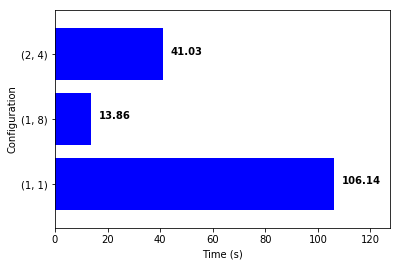

In [5]:
import matplotlib.pyplot as plt

required = results[1, 1][0], results[1, 8][0], results[2, 4][0]

fig, ax = plt.subplots(1)
ax.barh(range(3), required, color="blue")
ax.set_yticks(range(3))
ax.set_yticklabels(["(1, 1)", "(1, 8)", "(2, 4)"])
for i, v in enumerate(required):
    ax.text(v + 3, i, str(round(v * 100) / 100), color="black", fontweight="bold")
plt.xlabel("Time (s)")
plt.ylabel("Configuration")
plt.margins(x=0.2, y=0.1)
plt.savefig("required_time.jpg", dpi=600, format="jpg")
plt.show()

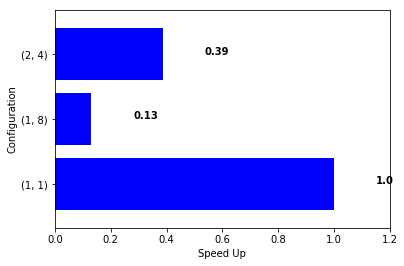

In [7]:
required = required[0] / required[0], required[0] / required[1], required[0] / required[2]

fig, ax = plt.subplots(1)
ax.barh(range(3), required, color="blue")
ax.set_yticks(range(3))
ax.set_yticklabels(["(1, 1)", "(1, 8)", "(2, 4)"])
for i, v in enumerate(required):
    ax.text(v + 0.15, i, str(round(v * 100) / 100), color="black", fontweight="bold")
plt.xlabel("Speed Up")
plt.ylabel("Configuration")
plt.margins(x=0.2, y=0.1)
plt.savefig("required_speedup.jpg", dpi=600, format="jpg")
plt.show()

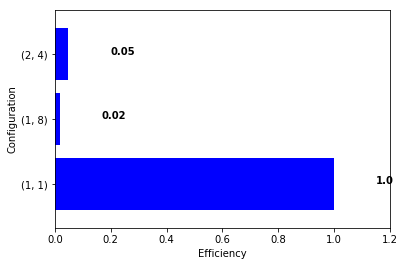

In [8]:
required = required[0], required[1] / 8, required[2] / 8

fig, ax = plt.subplots(1)
ax.barh(range(3), required, color="blue")
ax.set_yticks(range(3))
ax.set_yticklabels(["(1, 1)", "(1, 8)", "(2, 4)"])
for i, v in enumerate(required):
    ax.text(v + 0.15, i, str(round(v * 100) / 100), color="black", fontweight="bold")
plt.xlabel("Efficiency")
plt.ylabel("Configuration")
plt.margins(x=0.2, y=0.1)
plt.savefig("required_efficiency.jpg", dpi=600, format="jpg")
plt.show()

In [9]:
results = [results[conf] for conf in confs]

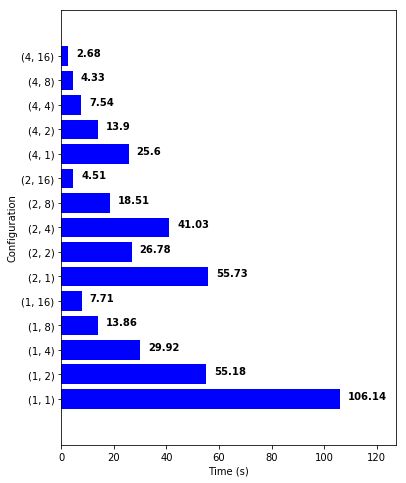

In [10]:
required = [r[0] for r in results]

fig, ax = plt.subplots(1)
fig.set_figheight(8)
ax.barh(range(len(confs)), required, color="blue")
ax.set_yticks(range(len(confs)))
ax.set_yticklabels([str(conf) for conf in confs])
for i, v in enumerate(required):
    ax.text(v + 3, i, str(round(v * 100) / 100), color="black", fontweight="bold")
plt.xlabel("Time (s)")
plt.ylabel("Configuration")
plt.margins(x=0.2, y=0.1)
plt.savefig("extra_time.jpg", dpi=600, format="jpg")
plt.show()

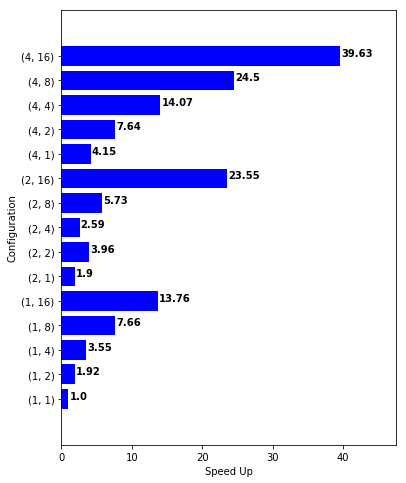

In [11]:
required = [required[0] / r for r in required]

fig, ax = plt.subplots(1)
fig.set_figheight(8)
ax.barh(range(len(confs)), required, color="blue")
ax.set_yticks(range(len(confs)))
ax.set_yticklabels([str(conf) for conf in confs])
for i, v in enumerate(required):
    ax.text(v + 0.15, i, str(round(v * 100) / 100), color="black", fontweight="bold")
plt.xlabel("Speed Up")
plt.ylabel("Configuration")
plt.margins(x=0.2, y=0.1)
plt.savefig("extra_speedup.jpg", dpi=600, format="jpg")
plt.show()

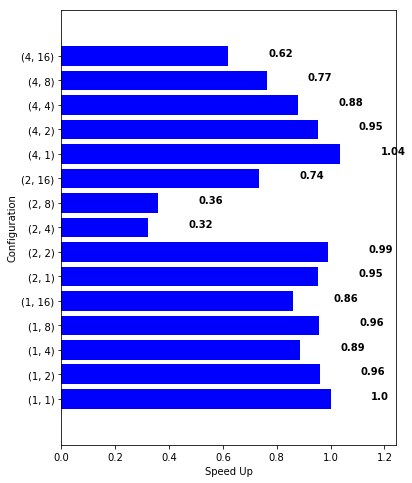

In [12]:
required = [r / node / core for r, (node, core) in zip(required, confs)]

fig, ax = plt.subplots(1)
fig.set_figheight(8)
ax.barh(range(len(confs)), required, color="blue")
ax.set_yticks(range(len(confs)))
ax.set_yticklabels([str(conf) for conf in confs])
for i, v in enumerate(required):
    ax.text(v + 0.15, i, str(round(v * 100) / 100), color="black", fontweight="bold")
plt.xlabel("Speed Up")
plt.ylabel("Configuration")
plt.margins(x=0.2, y=0.1)
plt.savefig("extra_efficiency.jpg", dpi=600, format="jpg")
plt.show()